In [21]:
import bt
import pandas as pd

In [41]:
# fetch some data
data = bt.get('spy,agg', start='2010-01-01')
print data.head()

                  spy        agg
Date                            
2009-12-31  95.219070  83.562744
2010-01-04  96.833946  83.659889
2010-01-05  97.090271  84.040482
2010-01-06  97.158661  83.991890
2010-01-07  97.568771  83.894699


In [51]:
# create the strategy
s = bt.Strategy('s1', [bt.algos.RunMonthly(),
                       bt.algos.SelectHasData(),
                       bt.algos.WeighMeanVar(),
                       bt.algos.Rebalance()])

In [52]:
# create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

s1
0% [############################# ] 100% | ETA: 00:00:00

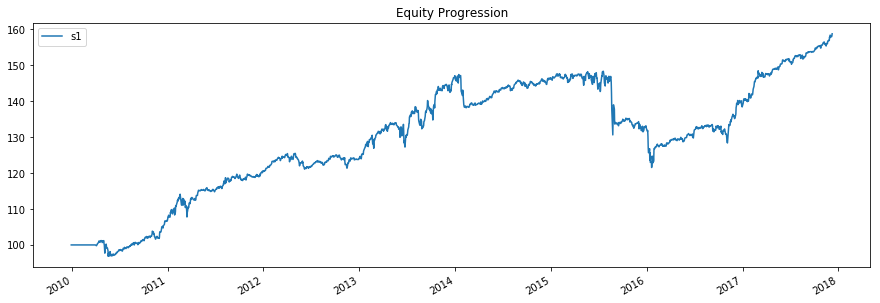

In [53]:
# first let's see an equity curve
res.plot()

In [46]:
# ok and what about some stats?
res.display()

Stat                 s1
-------------------  ----------
Start                2009-12-30
End                  2017-12-08
Risk-free rate       0.00%

Total Return         93.29%
Daily Sharpe         1.23
Daily Sortino        1.59
CAGR                 8.65%
Max Drawdown         -7.83%
Calmar Ratio         1.11

MTD                  0.25%
3m                   3.78%
6m                   5.34%
YTD                  11.68%
1Y                   11.67%
3Y (ann.)            6.68%
5Y (ann.)            8.71%
10Y (ann.)           8.65%
Since Incep. (ann.)  8.65%

Daily Sharpe         1.23
Daily Sortino        1.59
Daily Mean (ann.)    8.55%
Daily Vol (ann.)     6.98%
Daily Skew           -0.37
Daily Kurt           4.11
Best Day             2.48%
Worst Day            -3.11%

Monthly Sharpe       1.44
Monthly Sortino      2.59
Monthly Mean (ann.)  8.43%
Monthly Vol (ann.)   5.86%
Monthly Skew         -0.01
Monthly Kurt         0.38
Best Month           5.69%
Worst Month          -3.39%

Yearly Sharpe 

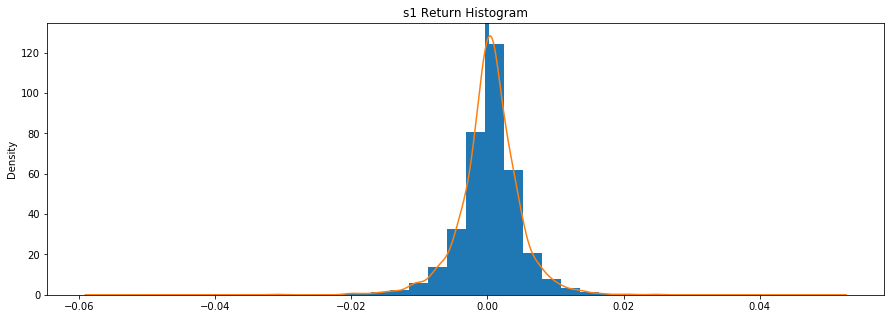

In [47]:
# ok and how does the return distribution look like?
res.plot_histogram()

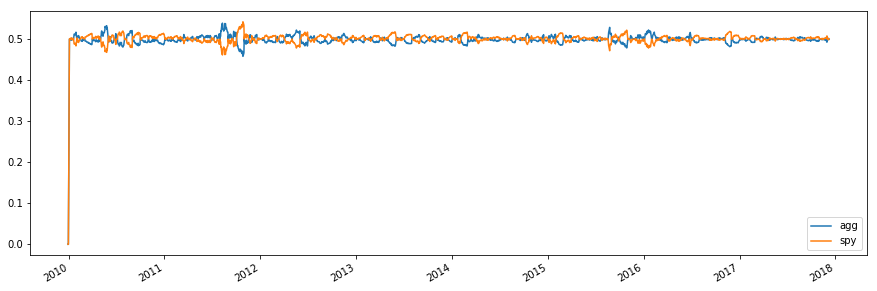

In [48]:
# and just to make sure everything went along as planned, let's plot the security weights over time
res.plot_security_weights()

s2
0% [############################# ] 100% | ETA: 00:00:00

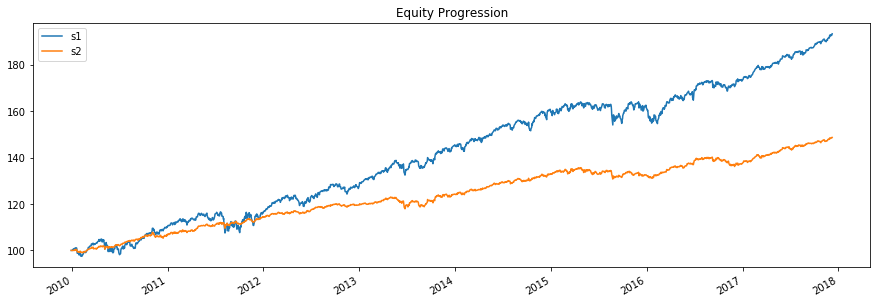

In [49]:
# create our new strategy
s2 = bt.Strategy('s2', [bt.algos.RunWeekly(),
                        bt.algos.SelectAll(),
                        bt.algos.WeighInvVol(),
                        bt.algos.Rebalance()])

# now let's test it with the same data set. We will also compare it with our first backtest.
test2 = bt.Backtest(s2, data)
# we include test here to see the results side-by-side
res2 = bt.run(test, test2)

res2.plot()

In [50]:
res2.display()

Stat                 s1          s2
-------------------  ----------  ----------
Start                2009-12-30  2009-12-30
End                  2017-12-08  2017-12-08
Risk-free rate       0.00%       0.00%

Total Return         93.29%      48.66%
Daily Sharpe         1.23        1.56
Daily Sortino        1.59        2.15
CAGR                 8.65%       5.12%
Max Drawdown         -7.83%      -4.07%
Calmar Ratio         1.11        1.26

MTD                  0.25%       0.26%
3m                   3.78%       1.76%
6m                   5.34%       3.23%
YTD                  11.68%      8.14%
1Y                   11.67%      8.15%
3Y (ann.)            6.68%       4.00%
5Y (ann.)            8.71%       4.41%
10Y (ann.)           8.65%       5.12%
Since Incep. (ann.)  8.65%       5.12%

Daily Sharpe         1.23        1.56
Daily Sortino        1.59        2.15
Daily Mean (ann.)    8.55%       5.05%
Daily Vol (ann.)     6.98%       3.24%
Daily Skew           -0.37       -0.29
Daily Kurt   